### Import Library

In [1]:
# Import library for create visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Library for encoder
from sklearn.preprocessing import LabelEncoder

# Library Machine Learning
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb

# Library for measuring the predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Read data as df
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\Body Mass Index\BMI.csv', sep = ',')

In [3]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


### Feature Engineering

In [6]:
Le = LabelEncoder()
df['Gender'] = Le.fit_transform(df['Gender'])

In [7]:
df.insert(3, 'BMI', df['Weight'] / ((df['Height'])/100)**2)

### EDA

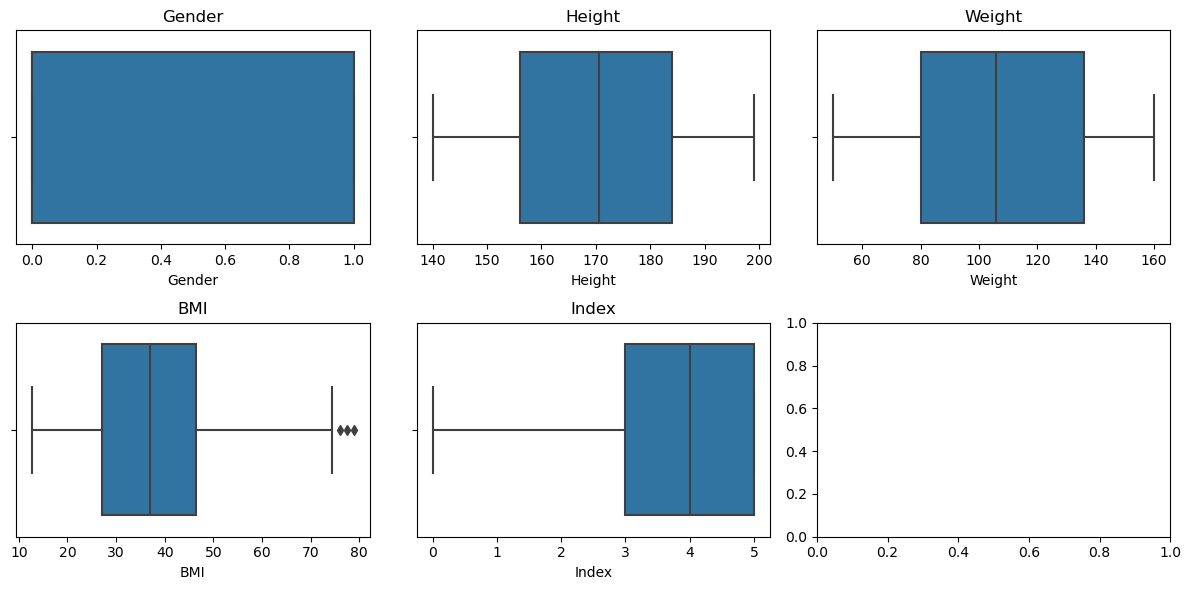

In [8]:
fig,ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,6))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)
    
plt.tight_layout()

<Axes: >

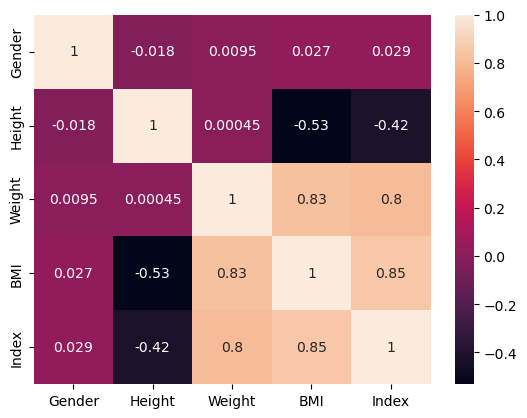

In [9]:
sns.heatmap(df.corr(), annot = True)

### Build Machine Learning 

In [10]:
y = df['Index']
X = df.drop(['Index'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

### Using LazyPredict to Easy find the best Machine Learning

In [12]:
LC = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)

predictions, model_LC = LC.fit(X_train, X_test, y_train, y_test)
print(predictions.head(5))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]

                        Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
XGBClassifier               0.99               0.99    None      0.99   
DecisionTreeClassifier      0.99               0.99    None      0.99   
BaggingClassifier           0.99               0.99    None      0.99   
RandomForestClassifier      0.97               0.99    None      0.97   
ExtraTreesClassifier        0.96               0.98    None      0.96   

                        Time Taken  
Model                               
XGBClassifier                 0.11  
DecisionTreeClassifier        0.01  
BaggingClassifier             0.02  
RandomForestClassifier        0.18  
ExtraTreesClassifier          0.15  


In [13]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [14]:
model_Xgb = XGB
Xgb_predict = model_Xgb.predict(X_test)

### Evaluation the Machine Learning

In [15]:
accuracy_score(y_test, Xgb_predict)

0.99

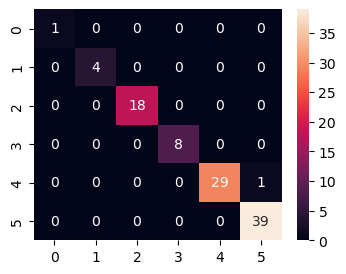

In [16]:
cm = confusion_matrix(list(y_test), Xgb_predict)
plt.figure(figsize = (4, 3))
sns.heatmap(cm, annot = True)
plt.show()

In [17]:
# Getting The classification_report
print(classification_report(list(y_test), Xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           4       1.00      0.97      0.98        30
           5       0.97      1.00      0.99        39

    accuracy                           0.99       100
   macro avg       1.00      0.99      1.00       100
weighted avg       0.99      0.99      0.99       100

